<img src="https://user-images.strikinglycdn.com/res/hrscywv4p/image/upload/c_limit,fl_lossy,h_300,w_300,f_auto,q_auto/1266110/Logo_wzxi0f.png" style="float: left; margin: 20px; height: 55px">

**Si hay sol, hay playa. Si hay playa, hay alcohol. Si hay alcohol, hay sexo. Si es contigo, mejor - [Bad Bunny](https://en.wikipedia.org/wiki/Bad_Bunny)**

# Clustering 

[SLIDES](https://docs.google.com/presentation/d/11f6tF9aEEUBGbWVMG26IEfi5dlZOMduKgzmjgLJjSGk/edit?usp=sharing)

## K Means

###### Set-up

Code taken from [ISLR Python](https://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%2010.ipynb).

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] += 3
X[:25,1] += -4

X[:5]

array([[ 2.58324215, -4.05626683],
       [ 0.8638039 , -2.35972919],
       [ 1.20656441, -4.84174737],
       [ 3.50288142, -5.24528809],
       [ 1.94204778, -4.90900761]])

Text(0.5, 1.0, 'Some Random Data')

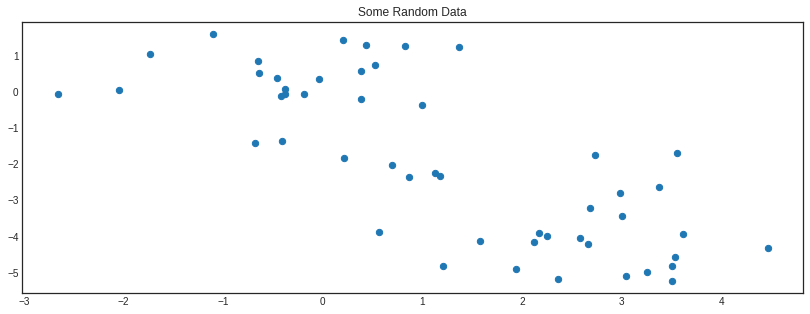

In [3]:
fig, (ax1) = plt.subplots(1, figsize=(14,5))
ax1.scatter(X[:,0], X[:,1], s=40, cmap=plt.cm.prism) 
plt.title("Some Random Data")

### Finding the clusters

2 Clusters

In [4]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(n_clusters=2, n_init=20)

In [5]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

In [6]:
pd.Series(km1.labels_).value_counts()

1    26
0    24
dtype: int64

In [7]:
km1.cluster_centers_

array([[-0.23940153,  0.14703307],
       [ 2.53287159, -3.80815122]])

In [8]:
# Sum of distances of samples to their closest cluster center.
km1.inertia_

99.30578397914687

3 Clusters

In [9]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(n_clusters=3, n_init=20)

In [10]:
km2.labels_

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0], dtype=int32)

In [11]:
pd.Series(km2.labels_).value_counts()

2    21
1    20
0     9
dtype: int64

In [12]:
km2.cluster_centers_

array([[ 0.69945422, -2.14934345],
       [-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797]])

In [13]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

68.97379200939724

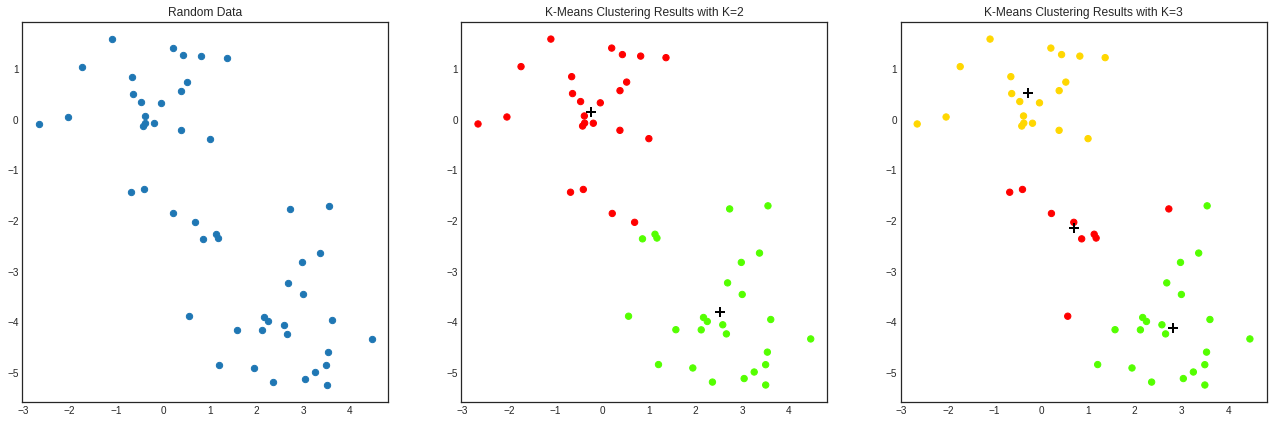

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22.3,7))

ax1.scatter(X[:,0], X[:,1], s=40, cmap=plt.cm.prism) 
ax1.set_title("Random Data")

ax2.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=2')
ax2.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax3.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax3.set_title('K-Means Clustering Results with K=3')
ax3.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

## Hierarchical Clustering

###### Set-up 

Code taken from [Stack Abuse](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/).

In [15]:
Y = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

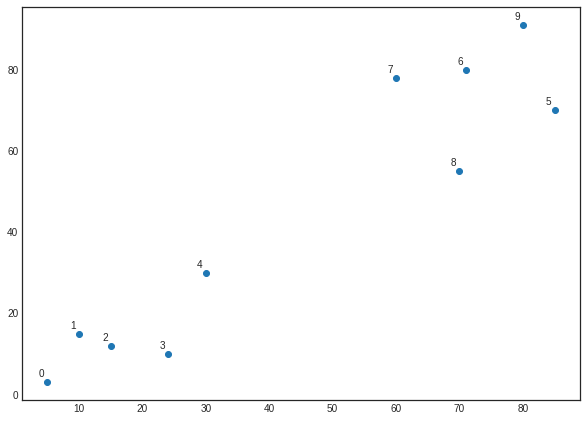

In [16]:
labels = range(0, 10)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(Y[:,0],Y[:,1], label='True Position')

for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

### Scipy

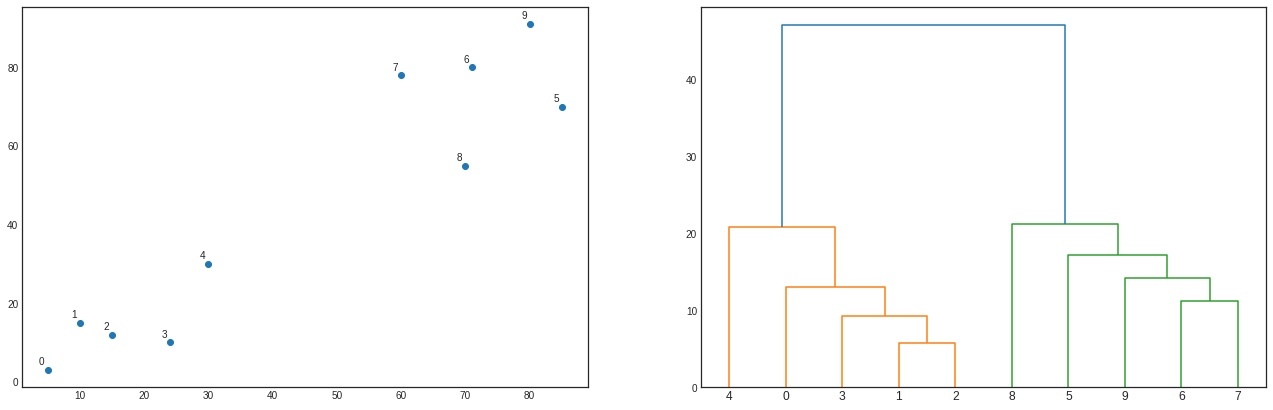

In [17]:
# Step 1: Select the type of linkage and generate the hierarchical clusters
linked = shc.linkage(Y, 'single')

# Step 2: Plot the hierarchical clustering as a dendrogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22.3,7))
shc.dendrogram(linked, ax=ax2)

ax1.scatter(Y[:,0],Y[:,1], label='True Position')

for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    ax1.annotate(label,xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

plt.show()

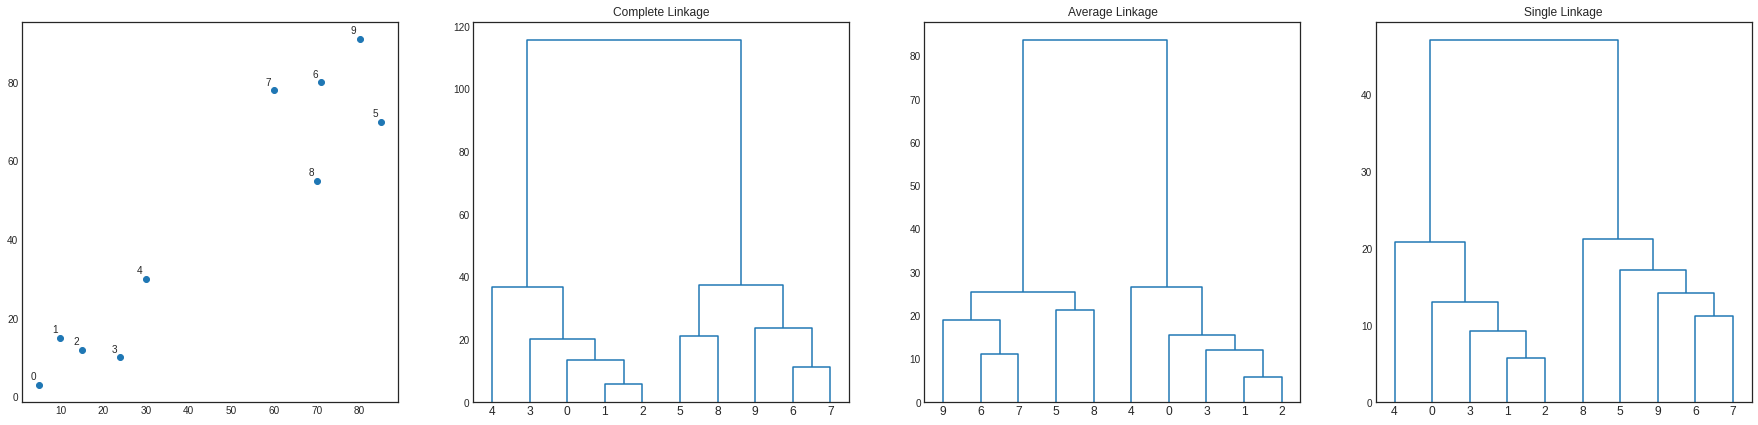

In [18]:
# We repeat the process 3 times to try multiple types of linkage
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(31, 7))

# This time we define linkage through functions instead of an argument
for linkage, cluster, ax in zip([shc.complete(Y),
                                 shc.average(Y),
                                 shc.single(Y)],
                                ['c1','c2','c3'],
                                [ax2,ax3,ax4]):
    shc.dendrogram(linkage, ax=ax, color_threshold=2)

ax2.set_title('Complete Linkage')
ax3.set_title('Average Linkage')
ax4.set_title('Single Linkage')

ax1.scatter(Y[:,0],Y[:,1], label='True Position')

for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    ax1.annotate(label,xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

plt.show()

## Clustering SegmentationSpending Score (1-100)

Material taken from [Stackabuse](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/).

In [19]:
customer_data = pd.read_csv('Resources/shopping-data.csv')

In [20]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
data = customer_data.iloc[:, 3:5].values

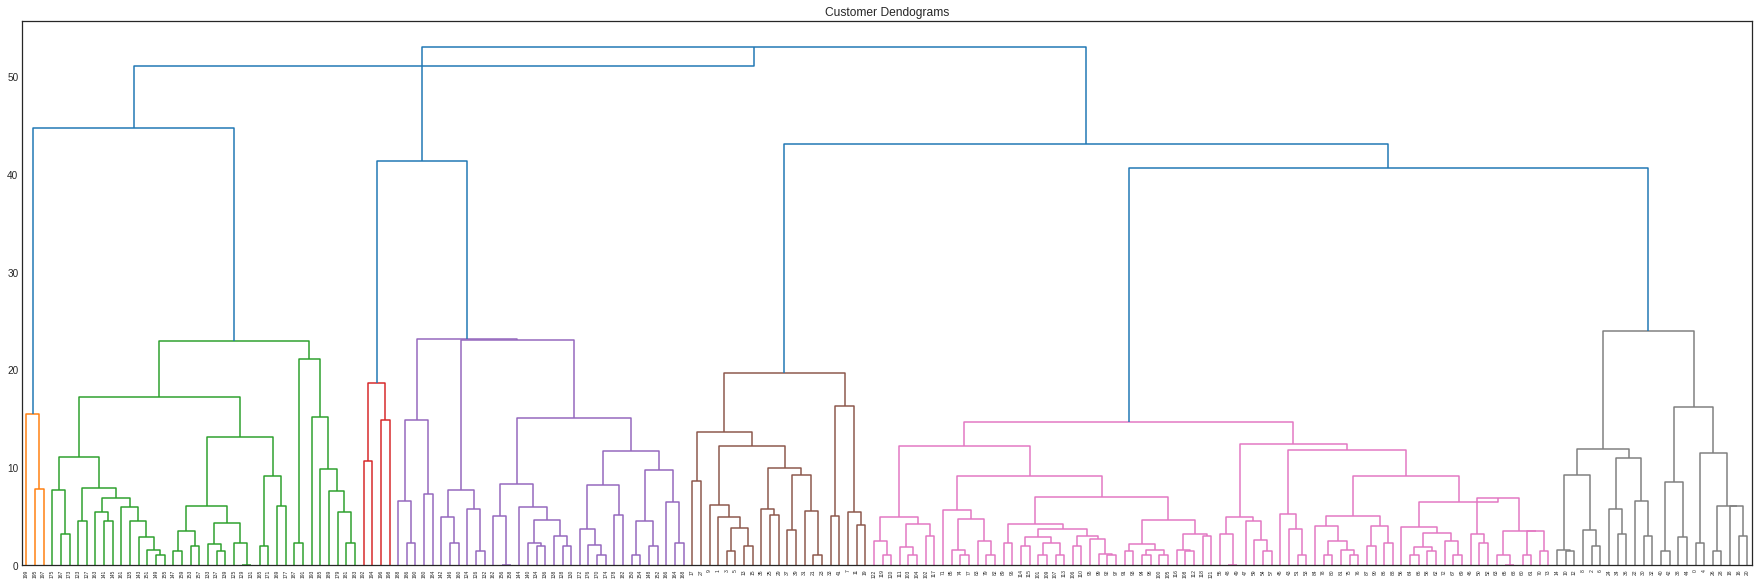

In [22]:
# This time we embed our clustering engine inside of the plot generator (a one liner!)
plt.figure(figsize=(31, 10))
plt.title("Customer Dendograms")
shc.dendrogram(shc.linkage(data, method='centroid'))
plt.show()

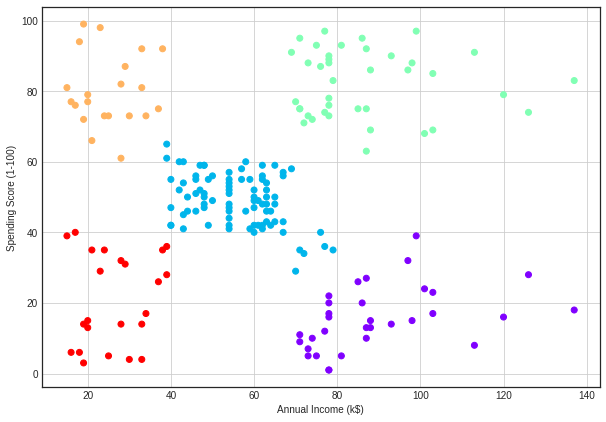

In [23]:
from sklearn.cluster import AgglomerativeClustering # Hierarchical Clustering using sklearn

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()